In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import requests
import pandas as pd

In [82]:
# Limpieza del DATASET
csv_file = requests.get("https://raw.githubusercontent.com/Jaider0111/NSFDA_09_Term_Project/main/CERTIFICACIONES_SIG24_08_WFL1.csv")
with open("data.csv", "wt") as f:
    f.write(csv_file.text)
dataset = pd.read_csv("data.csv", on_bad_lines='skip')
dataset['sector'] = dataset['sector'].str.split(' - ')
dataset['tramo'] = dataset['tramo'].str.split(' - ')
dataset['clean_data'] = np.select(
    [
        dataset['sector'].str.len() > 1
    ], 
    [
        dataset['sector']
    ], 
    default=dataset['tramo']
)
dataset['origen'] = dataset['clean_data'].str[0]
dataset['dest'] = dataset['clean_data'].str[1:]
dataset = dataset[dataset['dest'].str.len() > 0]
dataset[['origen', 'dest']].to_csv('fixed_data.csv', index=False, )
sc = dataset[dataset['dest'].str.len() > 1]
di = {
    'origen': sc['dest'].str[:-1].array,
    'desc': sc['dest'].str[1:]
}
# dataset = dataset.append(df2, ignore_index = True)
# sc.shape


In [83]:
# Carga del dataset limpio
excel_file = requests.get("https://github.com/Jaider0111/NSFDA_09_Term_Project/blob/main/Dataset_TP.xlsx?raw=true")
with open("Dataset_TP.xlsx", "wb") as f:
    f.write(excel_file.content)
datos = pd.read_excel('Dataset_TP.xlsx',sheet_name = 'Final data')

In [84]:
# Eliminacion de caracteres innecesarios
caracteres = ["'","[","]","(",")"]
for x in caracteres:
  datos.origen = datos.origen.str.replace(x,"")
  datos.dest = datos.dest.str.replace(x,"")
datos

<ipython-input-84-588ad1e37f36>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datos.origen = datos.origen.str.replace(x,"")
<ipython-input-84-588ad1e37f36>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datos.dest = datos.dest.str.replace(x,"")


,origen,dest
0,Aguachica,Gamarra
1,Gamarra,Puerto Capulco
2,Aguaclara,Aguachica
3,Girardot,Cambao
4,Puerto Salgar,Río Ermitaño
...,...,...
469,paso de la torre,palmaseca
470,palmaseca,cali
471,redoma el salado,cucuta
472,Arimena,Juriepe


In [85]:
#Eliminacion de acentos
reempla = [("á","a"),("é","e"),("í","i"),("ó","o"),("ú","u"),("Á","A"),("É","E"),("Í","I"),("Ó","O"),("Ú","U")]
for x in reempla:
    datos.origen = datos.origen.str.replace(x[0],x[1])
    datos.dest = datos.dest.str.replace(x[0],x[1])  
datos['origen'] = datos['origen'].str.lstrip()
datos['origen'] = datos['origen'].str.rstrip()
datos['origen'] = datos['origen'].str.lower()
datos['dest'] = datos['dest'].str.lstrip()
datos['dest'] = datos['dest'].str.rstrip()
datos['dest'] = datos['dest'].str.lower()
datos = datos.drop_duplicates()
datos.origen.unique()                               

array(['aguachica', 'gamarra', 'aguaclara', 'girardot', 'puerto salgar',
       'bogota', 'malaga', 'santo domingo',
       'puente valencia sobre el rio cauca', 'villavicencio', 'cucuta',
       'transversal carmen', 'bosconia', 'valledupar', 'maicao',
       'caucasia', 'neiva', 'chaparral', 'la dorada', 'ortega', 'pipiral',
       'choachi', 'garzon', 'tesalia', 'barranca de upia', 'mumbu',
       'brisas', 'ocaña', 'puerto lopez', 'honda', 'belen', 'yacopi',
       'natagaima', 'choconta', 'el secreto',
       'paso por el puente sobre el rio ocoa', 'san gil', 'castilla',
       'saldaña', 'guamo', 'puerto rico', 'puente real', 'caqueza',
       'balsillas', 'las animas', 'chinchina', 'san jose del guaviare',
       'villagarzon', 'florencia', 'aracataca', 'barranquilla',
       'rio ariguani', 'sachica', 'puente la libertad', 'monterrey',
       'la uribe', 'la lejia', 'pamplona', 'pereira', 'sardinata',
       'coveñas', 'mocoa', 'inza', 'pedregal', 'tierracruz', 'hobo',
       '

In [86]:
datos.dest.unique()   

array(['gamarra', 'puerto capulco', 'aguachica', 'cambao', 'rio ermitaño',
       'sopo', 'los curos', 'mina blanca', 'cali', 'puerto carreño',
       'puente binacional tienditas', 'bosconia', 'valledupar', 'maicao',
       'puerto bolivar', 'zaragoza', 'balsillas', 'ortega',
       'puerto salgar', 'guamo', 'villavicencio', 'choachi', 'ubaque',
       'neiva', 'teruel', 'monterrey', 'santa cecilia', 'guasca',
       'guateque', 'alto del pozo', 'puerto gaitan', 'villeta', 'sacama',
       'la palma', 'castilla', 'natagaima', 'brisas', 'aguaclara',
       'onzaga', 'saldaña', 'espinal', 'granada', 'puerto bogota',
       'caqueza', 'el tablon', 'santo  domingo', 'bogota',
       'estacion uribe', 'puerto rico', 'saravena', 'cienaga',
       'santa marta', 'aracataca', 'tunja', 'fresno', 'yopal',
       'los patios', 'buenavista', 'zulia', 'san onofre',
       'san juan de villalobos', 'pedregal', 'juntas', 'naranjal',
       'yaguara', 'puerto lopez', 'laberinto', 'santana', 'las anim

In [87]:
all_nodes = pd.concat([pd.Series(datos.origen.unique()),pd.Series(datos.dest.unique())])

In [88]:
all_nodes_uni = all_nodes.unique()

In [89]:
all_nodes_df = pd.DataFrame(all_nodes_uni)
all_nodes_df = all_nodes_df.drop_duplicates()

In [90]:
all_nodes_df.insert(0, 'ID', range(1, len(all_nodes_df)+1))


In [91]:
all_nodes_df

,ID,0
0,1,aguachica
1,2,gamarra
2,3,aguaclara
3,4,girardot
4,5,puerto salgar
...,...,...
410,411,el palo
411,412,cienaga de rincon
412,413,san pelayo
413,414,siberia


In [92]:
datos1 = datos.merge(all_nodes_df,left_on='origen',right_on=0,how='left')
datos2 = datos1.merge(all_nodes_df,left_on='dest',right_on=0,how='left')
datos2

,origen,dest,ID_x,0_x,ID_y,0_y
0,aguachica,gamarra,1,aguachica,2,gamarra
1,gamarra,puerto capulco,2,gamarra,329,puerto capulco
2,aguaclara,aguachica,3,aguaclara,1,aguachica
3,girardot,cambao,4,girardot,330,cambao
4,puerto salgar,rio ermitaño,5,puerto salgar,77,rio ermitaño
...,...,...,...,...,...,...
428,paso de la torre,palmaseca,313,paso de la torre,314,palmaseca
429,palmaseca,cali,314,palmaseca,163,cali
430,redoma el salado,cucuta,326,redoma el salado,11,cucuta
431,arimena,juriepe,327,arimena,159,juriepe


In [93]:
edges = list(datos2[['ID_x','ID_y']].itertuples(index=False, name=None))
edges

[(1, 2),
 (2, 329),
 (3, 1),
 (4, 330),
 (5, 77),
 (6, 176),
 (7, 322),
 (8, 331),
 (9, 163),
 (10, 332),
 (11, 333),
 (12, 13),
 (13, 14),
 (14, 15),
 (15, 334),
 (16, 335),
 (17, 44),
 (18, 20),
 (19, 5),
 (20, 40),
 (21, 10),
 (6, 22),
 (22, 336),
 (23, 17),
 (24, 337),
 (25, 55),
 (26, 70),
 (6, 338),
 (27, 167),
 (28, 339),
 (29, 340),
 (30, 274),
 (31, 204),
 (32, 341),
 (33, 38),
 (17, 33),
 (34, 27),
 (35, 3),
 (36, 10),
 (37, 342),
 (38, 39),
 (39, 40),
 (40, 343),
 (41, 344),
 (30, 345),
 (42, 43),
 (43, 346),
 (44, 347),
 (41, 331),
 (45, 6),
 (46, 116),
 (47, 41),
 (48, 348),
 (30, 5),
 (49, 41),
 (50, 349),
 (51, 136),
 (52, 50),
 (53, 189),
 (54, 126),
 (55, 127),
 (56, 344),
 (57, 348),
 (58, 316),
 (59, 166),
 (60, 106),
 (61, 135),
 (62, 211),
 (63, 64),
 (64, 350),
 (65, 323),
 (66, 351),
 (10, 29),
 (67, 352),
 (68, 71),
 (69, 45),
 (70, 353),
 (71, 160),
 (72, 260),
 (73, 227),
 (74, 354),
 (75, 37),
 (76, 272),
 (77, 355),
 (78, 79),
 (79, 6),
 (80, 82),
 (81, 192)

In [94]:
B = nx.Graph()

B.add_edges_from(edges)

In [95]:
nx.is_connected(B)

False

In [96]:
dict(sorted(nx.closeness_centrality(B).items(), key=lambda item: item[1]))

{202: 0.0024154589371980675,
 385: 0.0024154589371980675,
 406: 0.03996195534461489,
 395: 0.040470798720338444,
 404: 0.040470798720338444,
 358: 0.04082948235767265,
 144: 0.04082948235767265,
 291: 0.041629572731825444,
 229: 0.04218206397487127,
 270: 0.04218206397487127,
 349: 0.04252771100879046,
 148: 0.04256302936112829,
 94: 0.042571868117095714,
 286: 0.042571868117095714,
 132: 0.043433226889380165,
 161: 0.044034976032192974,
 250: 0.044034976032192974,
 50: 0.04442141515013529,
 128: 0.04445995031834188,
 149: 0.04445995031834188,
 361: 0.04532997919687659,
 292: 0.04539019836552074,
 234: 0.04544050336204685,
 377: 0.046016797063495936,
 318: 0.046047805686854085,
 302: 0.046047805686854085,
 354: 0.04616706022246918,
 113: 0.04632354105024842,
 379: 0.04636544858484098,
 12: 0.046460018338328475,
 114: 0.046460018338328475,
 52: 0.046481086252777325,
 150: 0.046502173282947576,
 122: 0.046512723974560265,
 399: 0.04689040048441775,
 107: 0.047487799610348484,
 133: 0.047

In [97]:
dict(sorted(nx.degree_centrality(B).items(), key=lambda item: item[1]))

{329: 0.0024154589371980675,
 330: 0.0024154589371980675,
 8: 0.0024154589371980675,
 9: 0.0024154589371980675,
 333: 0.0024154589371980675,
 12: 0.0024154589371980675,
 334: 0.0024154589371980675,
 335: 0.0024154589371980675,
 18: 0.0024154589371980675,
 19: 0.0024154589371980675,
 21: 0.0024154589371980675,
 336: 0.0024154589371980675,
 337: 0.0024154589371980675,
 338: 0.0024154589371980675,
 339: 0.0024154589371980675,
 31: 0.0024154589371980675,
 32: 0.0024154589371980675,
 36: 0.0024154589371980675,
 345: 0.0024154589371980675,
 347: 0.0024154589371980675,
 349: 0.0024154589371980675,
 56: 0.0024154589371980675,
 57: 0.0024154589371980675,
 63: 0.0024154589371980675,
 350: 0.0024154589371980675,
 65: 0.0024154589371980675,
 351: 0.0024154589371980675,
 68: 0.0024154589371980675,
 69: 0.0024154589371980675,
 353: 0.0024154589371980675,
 73: 0.0024154589371980675,
 354: 0.0024154589371980675,
 76: 0.0024154589371980675,
 356: 0.0024154589371980675,
 357: 0.0024154589371980675,
 86:

In [98]:

dict(sorted(nx.betweenness_centrality(B).items(), key=lambda item: item[1]))

{329: 0.0,
 330: 0.0,
 8: 0.0,
 9: 0.0,
 333: 0.0,
 12: 0.0,
 334: 0.0,
 335: 0.0,
 18: 0.0,
 19: 0.0,
 21: 0.0,
 336: 0.0,
 337: 0.0,
 338: 0.0,
 339: 0.0,
 31: 0.0,
 32: 0.0,
 36: 0.0,
 345: 0.0,
 347: 0.0,
 349: 0.0,
 56: 0.0,
 57: 0.0,
 63: 0.0,
 350: 0.0,
 65: 0.0,
 351: 0.0,
 68: 0.0,
 69: 0.0,
 353: 0.0,
 73: 0.0,
 354: 0.0,
 76: 0.0,
 356: 0.0,
 357: 0.0,
 86: 0.0,
 89: 0.0,
 91: 0.0,
 358: 0.0,
 359: 0.0,
 100: 0.0,
 360: 0.0,
 361: 0.0,
 363: 0.0,
 113: 0.0,
 114: 0.0,
 365: 0.0,
 119: 0.0,
 366: 0.0,
 367: 0.0,
 124: 0.0,
 368: 0.0,
 369: 0.0,
 370: 0.0,
 372: 0.0,
 139: 0.0,
 373: 0.0,
 141: 0.0,
 374: 0.0,
 144: 0.0,
 375: 0.0,
 376: 0.0,
 148: 0.0,
 151: 0.0,
 153: 0.0,
 377: 0.0,
 168: 0.0,
 169: 0.0,
 378: 0.0,
 173: 0.0,
 174: 0.0,
 379: 0.0,
 179: 0.0,
 180: 0.0,
 184: 0.0,
 380: 0.0,
 187: 0.0,
 381: 0.0,
 190: 0.0,
 382: 0.0,
 193: 0.0,
 194: 0.0,
 196: 0.0,
 198: 0.0,
 384: 0.0,
 202: 0.0,
 385: 0.0,
 386: 0.0,
 387: 0.0,
 389: 0.0,
 392: 0.0,
 216: 0.0,
 220: 0.0,

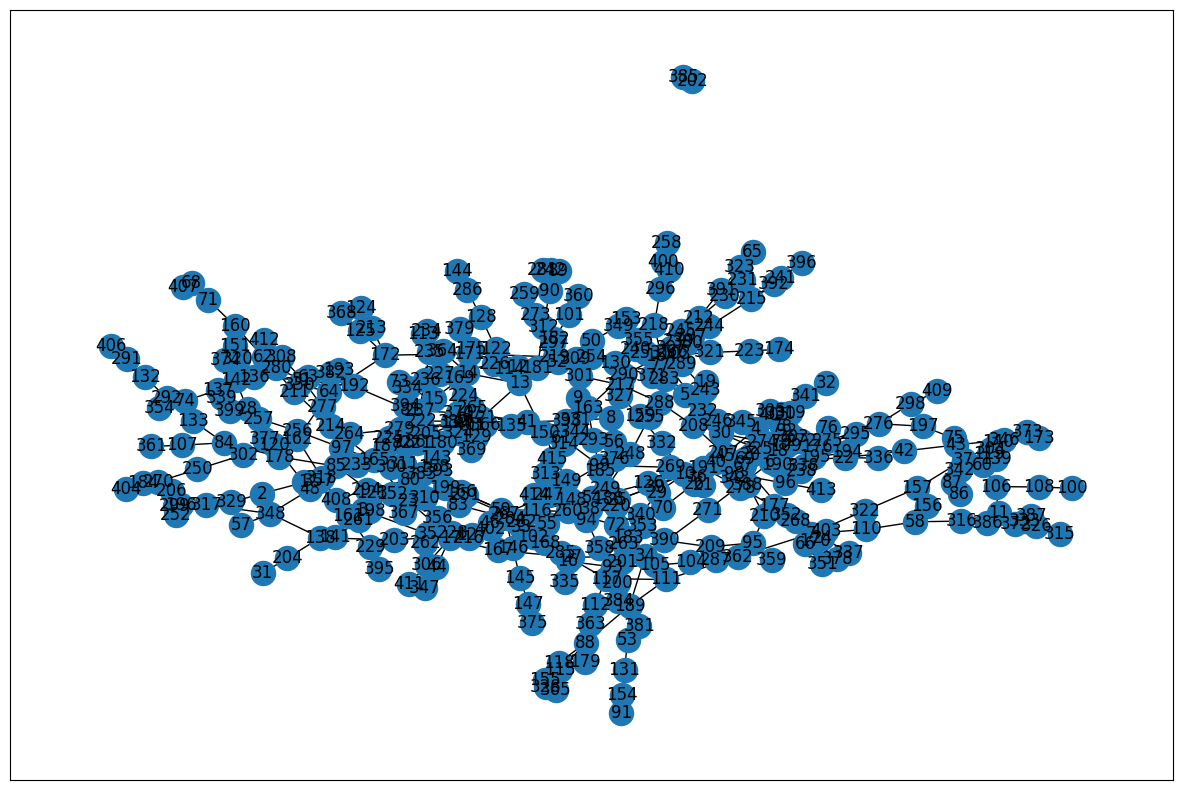

In [99]:
fig, ax = plt.subplots()
nx.draw_networkx(B)
fig.set_size_inches(15, 10)
plt.show()

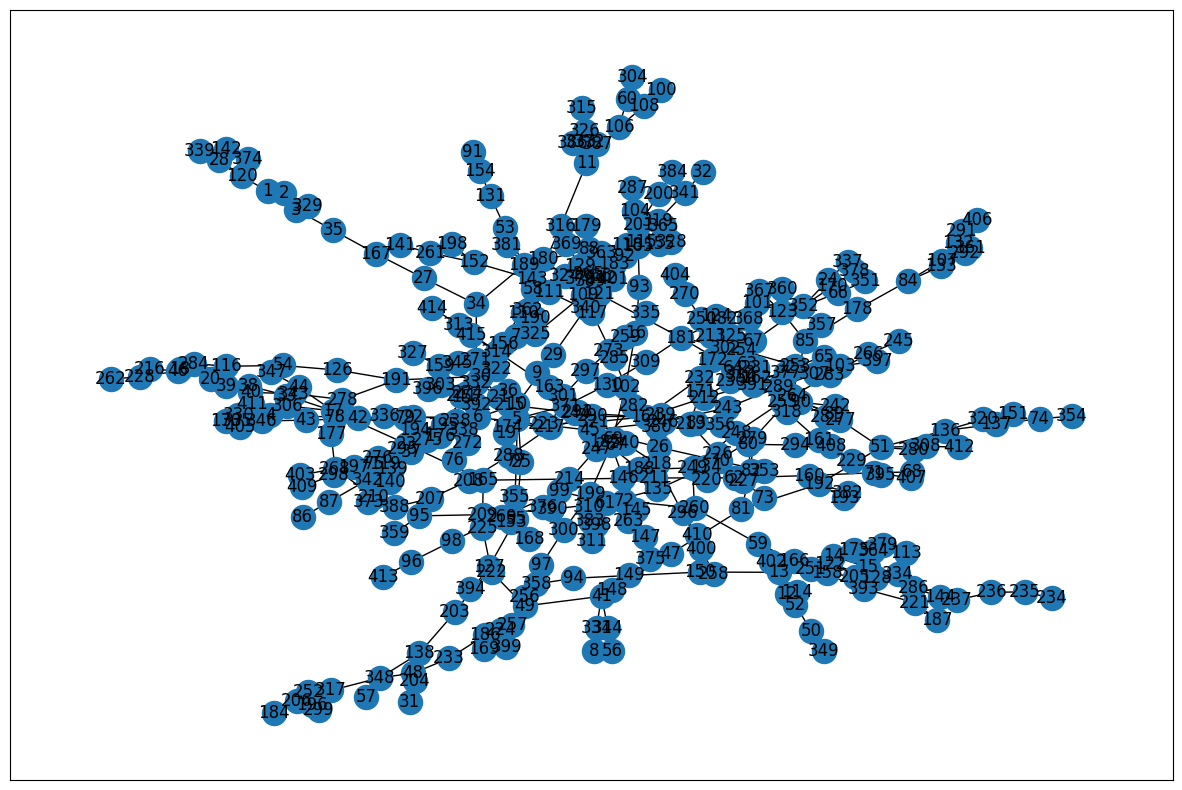

In [100]:
Bcc = sorted(nx.connected_components(B), key=len, reverse=True)
fig, ax = plt.subplots()
B0 = B.subgraph(Bcc[0])
nx.draw_networkx(B0)
fig.set_size_inches(15, 10)
plt.show()

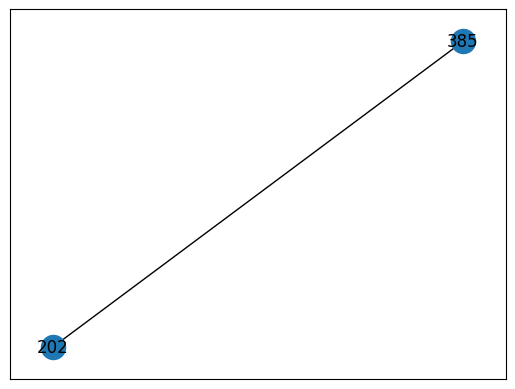

In [101]:
B1 = B.subgraph(Bcc[1])
nx.draw_networkx(B1)
fig.set_size_inches(15, 10)
plt.show()

In [102]:
nodes = Bcc[1]
data_nodes = all_nodes_df[all_nodes_df['ID'].isin(nodes)]
data_nodes

,ID,0
201,202,leticia
384,385,tarapaca


In [103]:
lista_df = []
for x in range(len (Bcc)):
    nodes = Bcc[x]
    data_nodes = all_nodes_df[all_nodes_df['ID'].isin(nodes)]
    data_nodes['componente'] = x
    lista_df.append(data_nodes)

<ipython-input-103-c4988c758730>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nodes['componente'] = x
<ipython-input-103-c4988c758730>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nodes['componente'] = x


In [104]:
dataframe_final = pd.concat(lista_df)

In [105]:
dataframe_final.to_excel('componentes.xlsx',index=False)

In [106]:
nx.is_connected(B0)

True

In [107]:
dict(sorted(nx.closeness_centrality(B0).items(), key=lambda item: item[1]))

{406: 0.04015594541910331,
 395: 0.04066725890830125,
 404: 0.04066725890830125,
 358: 0.041027683728340966,
 144: 0.041027683728340966,
 291: 0.04183165803634887,
 229: 0.04238683127572016,
 270: 0.04238683127572016,
 349: 0.04273415620786226,
 148: 0.04276964600851241,
 94: 0.042778527671062196,
 286: 0.042778527671062196,
 132: 0.04364406779661017,
 161: 0.044248738051766726,
 250: 0.044248738051766726,
 50: 0.04463705308775731,
 128: 0.04467577531988723,
 149: 0.04467577531988723,
 361: 0.045550027639579875,
 292: 0.0456105391342854,
 234: 0.04566108832982378,
 377: 0.04624017957351291,
 318: 0.046271338724168914,
 302: 0.046271338724168914,
 354: 0.0463911721652967,
 113: 0.046548412608744774,
 379: 0.04659052357797128,
 12: 0.04668555240793201,
 114: 0.04668555240793201,
 52: 0.04670672259381022,
 150: 0.046727911988204605,
 122: 0.04673851389676687,
 399: 0.04711802378774017,
 107: 0.047718322909427846,
 133: 0.04775150672229949,
 235: 0.04784022294472828,
 337: 0.04784577865520

In [108]:
dict(sorted(nx.degree_centrality(B0).items(), key=lambda item: item[1]))

{329: 0.0024271844660194173,
 330: 0.0024271844660194173,
 8: 0.0024271844660194173,
 9: 0.0024271844660194173,
 333: 0.0024271844660194173,
 12: 0.0024271844660194173,
 334: 0.0024271844660194173,
 335: 0.0024271844660194173,
 18: 0.0024271844660194173,
 19: 0.0024271844660194173,
 21: 0.0024271844660194173,
 336: 0.0024271844660194173,
 337: 0.0024271844660194173,
 338: 0.0024271844660194173,
 339: 0.0024271844660194173,
 31: 0.0024271844660194173,
 32: 0.0024271844660194173,
 36: 0.0024271844660194173,
 345: 0.0024271844660194173,
 347: 0.0024271844660194173,
 349: 0.0024271844660194173,
 56: 0.0024271844660194173,
 57: 0.0024271844660194173,
 63: 0.0024271844660194173,
 350: 0.0024271844660194173,
 65: 0.0024271844660194173,
 351: 0.0024271844660194173,
 68: 0.0024271844660194173,
 69: 0.0024271844660194173,
 353: 0.0024271844660194173,
 73: 0.0024271844660194173,
 354: 0.0024271844660194173,
 76: 0.0024271844660194173,
 356: 0.0024271844660194173,
 357: 0.0024271844660194173,
 86:

In [109]:
dict(sorted(nx.betweenness_centrality(B0).items(), key=lambda item: item[1]))

{329: 0.0,
 330: 0.0,
 8: 0.0,
 9: 0.0,
 333: 0.0,
 12: 0.0,
 334: 0.0,
 335: 0.0,
 18: 0.0,
 19: 0.0,
 21: 0.0,
 336: 0.0,
 337: 0.0,
 338: 0.0,
 339: 0.0,
 31: 0.0,
 32: 0.0,
 36: 0.0,
 345: 0.0,
 347: 0.0,
 349: 0.0,
 56: 0.0,
 57: 0.0,
 63: 0.0,
 350: 0.0,
 65: 0.0,
 351: 0.0,
 68: 0.0,
 69: 0.0,
 353: 0.0,
 73: 0.0,
 354: 0.0,
 76: 0.0,
 356: 0.0,
 357: 0.0,
 86: 0.0,
 89: 0.0,
 91: 0.0,
 358: 0.0,
 359: 0.0,
 100: 0.0,
 360: 0.0,
 361: 0.0,
 363: 0.0,
 113: 0.0,
 114: 0.0,
 365: 0.0,
 119: 0.0,
 366: 0.0,
 367: 0.0,
 124: 0.0,
 368: 0.0,
 369: 0.0,
 370: 0.0,
 372: 0.0,
 139: 0.0,
 373: 0.0,
 141: 0.0,
 374: 0.0,
 144: 0.0,
 375: 0.0,
 376: 0.0,
 148: 0.0,
 151: 0.0,
 153: 0.0,
 377: 0.0,
 168: 0.0,
 169: 0.0,
 378: 0.0,
 173: 0.0,
 174: 0.0,
 379: 0.0,
 179: 0.0,
 180: 0.0,
 184: 0.0,
 380: 0.0,
 187: 0.0,
 381: 0.0,
 190: 0.0,
 382: 0.0,
 193: 0.0,
 194: 0.0,
 196: 0.0,
 198: 0.0,
 384: 0.0,
 386: 0.0,
 387: 0.0,
 389: 0.0,
 392: 0.0,
 216: 0.0,
 220: 0.0,
 394: 0.0,
 395: 0.0,

In [110]:
print(B0.number_of_nodes())
print(B0.number_of_edges())

413
432


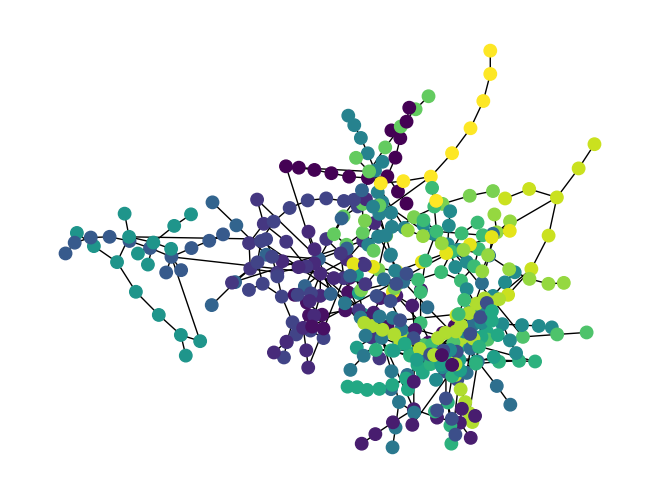

In [111]:

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

# pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
from community import community_louvain

partition = community_louvain.best_partition(B0,resolution=1.8)
pos = community_layout(B0, partition)

nx.draw(B0, pos, node_color=list(partition.values()), node_size=80); plt.show()


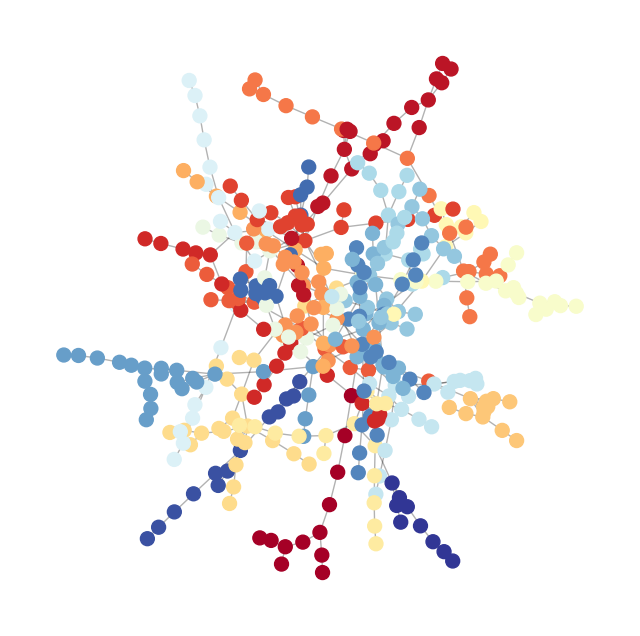

In [112]:
import networkx as nx
partition = community_louvain.best_partition(B0,resolution=1.5)  # compute communities

pos = nx.spring_layout(B0)  # compute graph layout
plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(B0, pos, node_size=100, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(B0, pos, alpha=0.3)
plt.show(B0)

In [113]:
nx.average_shortest_path_length(B0)

16.297879592844215

In [114]:
!pip install networkx-robustness==0.0.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
from networkx_robustness import networkx_robustness
initial, frac, apl = networkx_robustness.simulate_random_attack(B0, attack_fraction=0.2)

In [116]:
frac

[0.9927360774818402,
 0.9854721549636803,
 0.9830508474576272,
 0.9782082324455206,
 0.9757869249394673,
 0.9733656174334141,
 0.9685230024213075,
 0.9588377723970944,
 0.9588377723970944,
 0.9467312348668281,
 0.9443099273607748,
 0.9346246973365617,
 0.9297820823244553,
 0.927360774818402,
 0.9249394673123487,
 0.9225181598062954,
 0.9007263922518159,
 0.8958837772397095,
 0.8861985472154964,
 0.8837772397094431,
 0.8765133171912833,
 0.87409200968523,
 0.8716707021791767,
 0.6900726392251816,
 0.4430992736077482,
 0.4430992736077482,
 0.43825665859564167,
 0.4358353510895884,
 0.4358353510895884,
 0.4358353510895884,
 0.43099273607748184,
 0.43099273607748184,
 0.43099273607748184,
 0.42857142857142855,
 0.42857142857142855,
 0.4213075060532688,
 0.4213075060532688,
 0.4213075060532688,
 0.4213075060532688,
 0.4188861985472155,
 0.41646489104116224,
 0.41646489104116224,
 0.41646489104116224,
 0.41646489104116224,
 0.41646489104116224,
 0.24939467312348668,
 0.2397094430992736,
 0.2

In [117]:
nx.minimum_node_cut(B0,6,55)


{25, 127}

6 Bogota
51 Barranquilla
259 Buenaventura
181 Medellin
163 Cali

In [118]:
paths = nx.shortest_path(B0,6,55)
print(list(paths))

[6, 10, 25, 55]


In [119]:
paths = nx.all_simple_paths(B0, source=6, target=55)
len(list(paths))

78

In [120]:
short_path = nx.all_shortest_paths(B0,6,55)
for x in short_path:
  print(x)

[6, 10, 25, 55]


In [121]:
from itertools import combinations
important_nodes = [6, 51, 259, 181, 163]
list_combinations = []
for n in range(len(important_nodes) + 1):
    list_combinations += list(combinations(important_nodes, 2))

set_res = set(list_combinations) 
final_list = list(set_res)
final_list

[(51, 163),
 (51, 259),
 (259, 181),
 (6, 259),
 (6, 181),
 (51, 181),
 (259, 163),
 (6, 51),
 (181, 163),
 (6, 163)]

In [122]:
shortest_path_cities = []
quantity_paths = []
nodes_cuts = []

for x in final_list:
  short_path = nx.shortest_path(B0,x[0],x[1])
  paths = nx.all_simple_paths(B0, x[0],x[1])
  nodes_cut = nx.minimum_node_cut(B0,x[0],x[1])
  nodes_cuts.append(nodes_cut)
  quantity_paths.append([x[0],x[1], len(list(paths)),nodes_cut])
  shortest_path_cities.append(short_path)


In [123]:
for x in shortest_path_cities:
  print(x)

[51, 192, 81, 47, 41, 49, 222, 225, 165, 23, 17, 33, 38, 39, 40, 343, 278, 177, 268, 210, 388, 207, 208, 288, 217, 301, 163]
[51, 192, 81, 47, 41, 49, 222, 225, 165, 23, 17, 33, 38, 39, 40, 343, 278, 177, 268, 210, 388, 207, 208, 288, 217, 301, 297, 273, 259]
[259, 273, 297, 301, 163, 293, 185, 188, 249, 248, 255, 283, 103, 253, 254, 181]
[6, 274, 30, 191, 278, 177, 268, 210, 388, 207, 208, 288, 217, 301, 297, 273, 259]
[6, 45, 246, 243, 289, 253, 254, 181]
[51, 192, 81, 82, 80, 83, 282, 285, 117, 111, 189, 34, 271, 6, 45, 246, 243, 289, 253, 254, 181]
[259, 273, 297, 301, 163]
[6, 271, 34, 189, 111, 117, 285, 282, 83, 80, 82, 81, 192, 51]
[181, 254, 253, 103, 283, 255, 248, 249, 188, 185, 293, 163]
[6, 274, 30, 191, 278, 177, 268, 210, 388, 207, 208, 288, 217, 301, 163]


In [124]:
quantity_paths

[[51, 163, 3796, {217, 293}],
 [51, 259, 5208, {273}],
 [259, 181, 1872, {301}],
 [6, 259, 1040, {273}],
 [6, 181, 654, {254, 309}],
 [51, 181, 3148, {254, 309}],
 [259, 163, 466, {301}],
 [6, 51, 222, {192, 277}],
 [181, 163, 1338, {217, 293}],
 [6, 163, 762, {217, 293}]]

In [125]:
lista_unica = []
for x in nodes_cuts:
  for y in list(x):
    lista_unica.append(y)
lista_unica_final = list(set(lista_unica))
lista_unica_final

[192, 293, 301, 273, 309, 277, 217, 254]

In [126]:
nodes_disconected = all_nodes_df[all_nodes_df['ID'].isin(lista_unica_final)]
nodes_disconected

,ID,0
191,192,palmar de varela
216,217,buga
253,254,ancon sur
272,273,citronela
276,277,lomita arena
292,293,yumbo
300,301,loboguerrero
308,309,santuario
